# Income prediction using Logistic Regression

The data for this prediction model was obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). The model trys to predict the income level of individuals using the census data. Since there are just two income levels, the model using Logistic regression with sigmoid activation function 


In [467]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

Map all of the text labels in the data to integer values

In [468]:
def create_dataset(URL):
    headers = ["age", "workclass", "fnlwgt", "education", 
               "education-num", "marital-status", "occupation", 
               "relationship", "race", "gender", "capital-gain", 
               "capital-loss", "hours-per-week", 
               "native-country", "income"]
    df = pd.read_csv(URL, header=None, names=headers)
    df.head()
    
    # Map string labels to integers
    for col in ['workclass', 'education', 'marital-status', 
                'occupation', 'relationship','race', 'gender', 
                'native-country', 'income']:
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
        
    df = (df-df.min())/(df.max()-df.min())
    
    X = df[["age", "workclass", "fnlwgt", "education", "education-num", 
            "marital-status", "occupation", "relationship", 
            "race", "gender", "capital-gain", "capital-loss", 
            "hours-per-week", "native-country"]]
    Y = df[["income"]]
    
    return df,X.values,Y.values

In [469]:
# read data into a DataFrame
train_df, train_X, train_Y = create_dataset('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


In [470]:
test_df, test_X, test_Y = create_dataset('~/Downloads/adult.test')
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,0.50,0.144430,0.066667,0.400000,0.666667,0.500000,0.6,0.5,1.0,0.000000,0.0,0.397959,0.95,0.0
1,0.287671,0.50,0.051677,0.733333,0.533333,0.333333,0.357143,0.0,1.0,1.0,0.000000,0.0,0.500000,0.95,0.0
2,0.150685,0.25,0.219011,0.466667,0.733333,0.333333,0.785714,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95,1.0
3,0.369863,0.50,0.099418,1.000000,0.600000,0.333333,0.500000,0.0,0.5,1.0,0.076881,0.0,0.397959,0.95,1.0
4,0.013699,0.00,0.060942,1.000000,0.600000,0.666667,0.000000,0.6,1.0,0.0,0.000000,0.0,0.295918,0.95,0.0


In [471]:
def logistic_regression_model(train_X, train_Y, test_X, test_Y):
    weights = None
    bias = None
    X = tf.placeholder(tf.float32, shape=train_X.shape, name='X')
    Y = tf.placeholder(tf.float32, shape=train_Y.shape, name='Y')

    w = tf.Variable(tf.random_normal(shape=(train_X.shape[1],1)), name='W')
    b = tf.Variable(0.0, name='b')

    Y_predicted = tf.nn.sigmoid(tf.matmul(X, w) + b) 
    loss = tf.reduce_mean(-(Y*tf.log(Y_predicted) + (1 - Y)*tf.log(1 - Y_predicted)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_values = []
        epochs = 50
        for i in range(epochs):
            loss_val,_ = sess.run([loss, optimizer], feed_dict={X: train_X, Y: train_Y})
            loss_values.append(loss_val)
        
        plt.plot(range(0, epochs), loss_values, '-')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()

        weights, bias = sess.run([w, b])
        
        # Test the regression model
        z = tf.matmul(tf.cast(test_X, tf.float32), weights) + bias
        Y_test_predicted = tf.nn.sigmoid(z)
        y_test_predictions = sess.run(Y_test_predicted)   
        logit = lambda x: 1.0 if x > 0.5 else 0.0
        vfunc = np.vectorize(logit)
        y_test_predictions = vfunc(y_test_predictions)
        return np.sum(y_test_predictions == test_Y)/test_Y.shape[0]

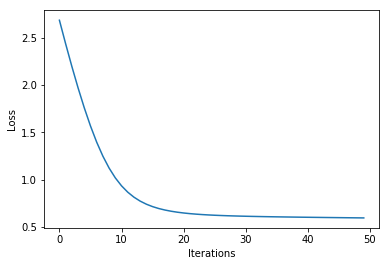

0.754192002948


In [472]:
accuracy = logistic_regression_model(train_X, train_Y, test_X, test_Y)
print(accuracy)